<a href="https://colab.research.google.com/github/nirmalaselvaraj963-sys/ml-work/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
#call pandas

In [43]:
df = pd.read_csv("/content/thalapakattu_t_nagar_reviews_synthetic_200.csv")
print(df.head()) #load dataset

        review_id   reviewer_name        date  rating_overall  rating_food  \
0  synthetic_0001     Vijaya Shah  2010-07-24             4.5          4.4   
1  synthetic_0002  Nirmala Murthy  2024-07-29             4.4          4.5   
2  synthetic_0003   Karthik Patel  2012-03-03             3.6          3.7   
3  synthetic_0004      Priya Nair  2016-06-28             4.7          4.8   
4  synthetic_0005     Kavya Singh  2021-12-24             4.6          4.4   

   rating_service  rating_ambience  \
0             4.9              4.5   
1             4.4              3.9   
2             3.7              3.1   
3             4.6              4.3   
4             4.7              5.0   

                                         review_text            source  \
0  Service was slow during peak hours but staff w...  MockSource:Synth   
1  Disappointed with the mutton pieces. Felt less...  MockSource:Synth   
2  Had a nice meal. Staff were attentive and cour...  MockSource:Synth   
3  Dis

In [44]:
import re  #for Text Preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()                          # lowercase
    text = re.sub(r'[^a-z\s]', '', text)         # remove special chars
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return " ".join(tokens)

df["cleaned_text"] = df["review_text"].apply(preprocess)
print(df[["review_text", "cleaned_text"]].head())


                                         review_text  \
0  Service was slow during peak hours but staff w...   
1  Disappointed with the mutton pieces. Felt less...   
2  Had a nice meal. Staff were attentive and cour...   
3  Disappointed with the mutton pieces. Felt less...   
4  Good portion sizes, tasty gravy but a bit oily...   

                                        cleaned_text  
0                service slow peak hour staff polite  
1  disappointed mutton piece felt less expected k...  
2                nice meal staff attentive courteous  
3       disappointed mutton piece felt less expected  
4       good portion size tasty gravy bit oily taste  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [45]:
from collections import Counter
#See the most common words in reviews.
all_words = " ".join(df["cleaned_text"]).split()
word_freq = Counter(all_words)
print(word_freq.most_common(20))


[('good', 51), ('biryani', 34), ('portion', 30), ('loved', 28), ('peak', 27), ('hour', 27), ('taste', 27), ('clean', 24), ('place', 19), ('service', 18), ('like', 18), ('staff', 16), ('ambience', 16), ('okay', 16), ('family', 16), ('dinner', 16), ('noise', 16), ('high', 16), ('weekend', 16), ('hygiene', 16)]


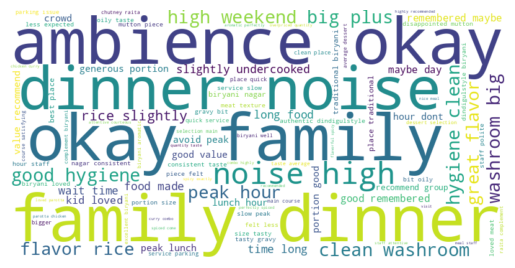

In [46]:
from wordcloud import WordCloud #Visualize common words easily.
import matplotlib.pyplot as plt

wc = WordCloud(width=800, height=400, background_color="white").generate(" ".join(all_words))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


In [47]:
def label_sentiment(score): #Creates a target variable for classification.
    if score >= 4: return "positive"
    elif score == 3: return "neutral"
    else: return "negative"

df["sentiment"] = df["rating_overall"].apply(label_sentiment)
print(df[["review_text","sentiment"]].head())


                                         review_text sentiment
0  Service was slow during peak hours but staff w...  positive
1  Disappointed with the mutton pieces. Felt less...  positive
2  Had a nice meal. Staff were attentive and cour...  negative
3  Disappointed with the mutton pieces. Felt less...  positive
4  Good portion sizes, tasty gravy but a bit oily...  positive


In [27]:
from sklearn.model_selection import train_test_split
#Train the model on one set and test on unseen data.
X_train, X_test, y_train, y_test = train_test_split(
    df["cleaned_text"], df["sentiment"], test_size=0.2, random_state=42
)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Models cannot read text directly — TF-IDF turns words into numbers.
vectorizer = TfidfVectorizer(max_features=2000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
#Learns patterns in reviews and corresponding sentiments.
model = LogisticRegression(max_iter=200)
model.fit(X_train_vec, y_train)


In [29]:
from sklearn.metrics import classification_report
#See precision, recall, f1-score for sentiment prediction.
y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.50      0.56      0.53        16
    positive       0.68      0.62      0.65        24

    accuracy                           0.60        40
   macro avg       0.59      0.59      0.59        40
weighted avg       0.61      0.60      0.60        40



In [30]:
new_reviews = [
    "The biryani was amazing and flavorful!",
    "Service was too slow and disappointing."
]

new_vec = vectorizer.transform(new_reviews)
predictions = model.predict(new_vec)

for review, pred in zip(new_reviews, predictions):
    print(f"Review: {review}\nPredicted Sentiment: {pred}\n")


Review: The biryani was amazing and flavorful!
Predicted Sentiment: positive

Review: Service was too slow and disappointing.
Predicted Sentiment: negative



In [36]:
sample_reviews = X_test.sample(4, random_state=42)
for review in sample_reviews:
    vec = vectorizer.transform([review])
    pred = model.predict(vec)[0]
    print(f"Review: {review}\nPredicted Sentiment: {pred}\n")


Review: great flavor rice slightly undercooked portion could bigger
Predicted Sentiment: negative

Review: good remembered maybe day
Predicted Sentiment: negative

Review: chutney raita complement biryani well
Predicted Sentiment: positive

Review: avoid peak lunch hour dont like crowd
Predicted Sentiment: positive



In [39]:
import joblib

# Save
joblib.dump(model, "sentiment_model.pkl")
joblib.dump(vectorizer, "/content/tfidf_vectorizer.pkl")

# Load
model = joblib.load("sentiment_model.pkl")
vectorizer = joblib.load("/content/tfidf_vectorizer.pkl")
